In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PART - C : Q-4

<b> The first model for all the three datasets will be KNN classifier and the other 2 models chosen by me are decision trees and neural networks ( a simple neural network with 2 hidden layers ) </b>

In [2]:
df=pd.read_csv("ckd.csv")

EDA and VISUALIZATIONS

In [3]:
df

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [4]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [5]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [6]:
df.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [7]:
df.isna().sum()

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

In [8]:
len(df.columns)

25

The prediction to be made as given in the question contains details of only two features out of 25. So, let us extract only those two features from the dataset 

In [9]:
df=df[["Hemoglobin","Blood Glucose Random","Class"]]

In [10]:
df.head()

,Hemoglobin,Blood Glucose Random,Class
0,11.2,117,1
1,9.5,70,1
2,10.8,380,1
3,5.6,157,1
4,7.7,173,1


In [11]:
df.tail()

,Hemoglobin,Blood Glucose Random,Class
153,15.7,140,0
154,16.5,75,0
155,15.8,100,0
156,14.2,114,0
157,15.8,131,0


In [12]:
print("Number of samples in class 1 (With Chronic Kidney Disease) : ",len(df[df.Class==1]))

Number of samples in class 1 (With Chronic Kidney Disease) :  43


In [13]:
print("Number of samples in class 0 (Without Chronic Kidney Disease) : ",len(df[df.Class==0]))

Number of samples in class 0 (Without Chronic Kidney Disease) :  115


In [14]:
df.describe()

,Hemoglobin,Blood Glucose Random,Class
count,158.000000,158.000000,158.000000
mean,13.687342,131.341772,0.272152
std,2.882204,64.939832,0.446483
min,3.100000,70.000000,0.000000
25%,12.600000,97.000000,0.000000
50%,14.250000,115.500000,0.000000
75%,15.775000,131.750000,1.000000
max,17.800000,490.000000,1.000000


In [15]:
df["Blood Glucose Random"].describe()["std"]

64.93983223609541

In [16]:
to_predict_Hemoglobin = 0
to_predict_Glucose_Level = (1.1 * df["Blood Glucose Random"].describe()["std"] + df["Blood Glucose Random"].describe()["mean"] )

In [17]:
print("We need to predict whether Alice has CKD")
print("From the question : - ")
print("Alice's Hemoglobin : ",to_predict_Hemoglobin)
print("Alice's Glucose Level : ",to_predict_Glucose_Level)

We need to predict whether Alice has CKD
From the question : - 
Alice's Hemoglobin :  0
Alice's Glucose Level :  202.7755876116037


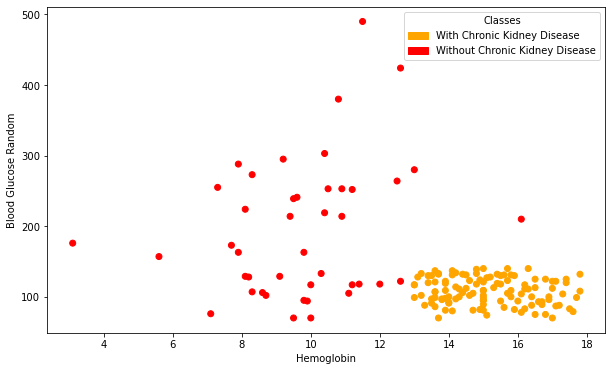

In [18]:
import matplotlib
from matplotlib.patches import Patch
x_feature = df.Hemoglobin
y_feature = df["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["orange","red"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in df.Class])
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

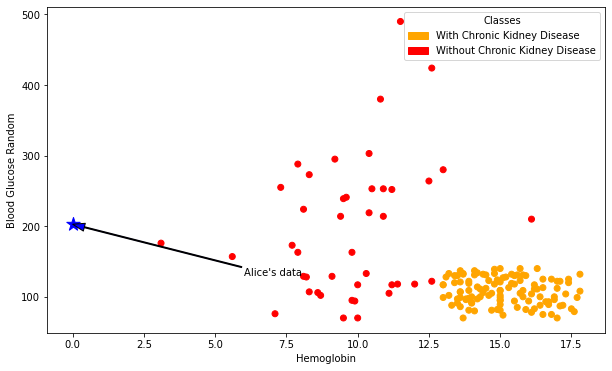

In [19]:
x_feature = df.Hemoglobin
y_feature = df["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["orange","red"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in df.Class])
new_point = (to_predict_Hemoglobin, to_predict_Glucose_Level)
plt.scatter(new_point[0], new_point[1], c='blue', marker='*', s=200)
plt.annotate("Alice's data", xy=new_point, xytext=(6, 130), arrowprops=dict(facecolor='blue', headwidth=8, width=1))
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

In [20]:
print("Train - Test split to carry out validations for our model")

Train - Test split to carry out validations for our model


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["Hemoglobin","Blood Glucose Random"]], df["Class"], test_size=0.2,random_state=0)

Light blue and Green color data represents the samples chosen for training


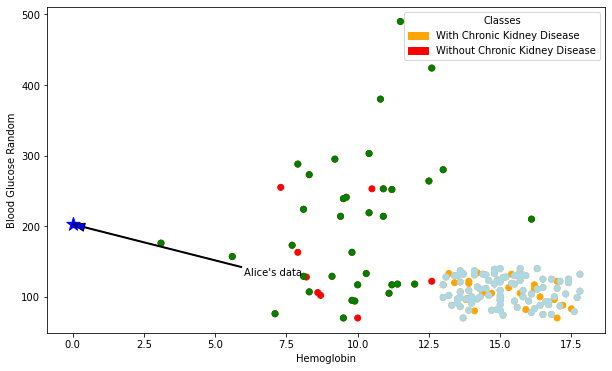

In [22]:
x_feature = df.Hemoglobin
y_feature = df["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["orange","red"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in df.Class])
new_point = (to_predict_Hemoglobin, to_predict_Glucose_Level)
plt.scatter(new_point[0], new_point[1], c='blue', marker='*', s=200)
plt.annotate("Alice's data", xy=new_point, xytext=(6, 130), arrowprops=dict(facecolor='blue', headwidth=8, width=1))
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
train_features_x=X_train.Hemoglobin
train_features_y=X_train["Blood Glucose Random"]
colors_train=["lightblue","green"]
plt.scatter(train_features_x,train_features_y, c=[colors_train[label] for label in y_train])
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)
print("Light blue and Green color data represents the samples chosen for training")

CLASSIFIER - KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [24]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
predictions=classifier.predict(X_test)

In [26]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [27]:
y_test

7      1
44     0
113    0
120    0
63     0
122    0
121    0
139    0
109    0
92     0
24     1
141    0
26     1
60     0
80     0
97     0
129    0
98     0
142    0
56     0
45     0
33     1
59     0
8      1
40     1
37     1
101    0
19     1
144    0
108    0
51     0
54     0
Name: Class, dtype: int64

VALIDATION

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.90625


In [30]:
precision = precision_score(y_test, predictions)
print("Precision : ",precision)

Precision :  0.8571428571428571


In [31]:
recall = recall_score(y_test, predictions)
print("Recall : ",recall)

Recall :  0.75


In [32]:
f1 = f1_score(y_test, predictions)
print("F1_Score : ",f1)

F1_Score :  0.7999999999999999


In [33]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[23  1]
 [ 2  6]]


In [34]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32



Prediction for Alice

In [35]:
class_Alice = classifier.predict([[to_predict_Hemoglobin, to_predict_Glucose_Level]])

In [36]:
class_Alice

array([1], dtype=int64)

In [37]:
print("Alice doesn't have CKD")

Alice doesn't have CKD


CLASSIFIER - DECISION TREES

In [38]:
from sklearn import tree

In [39]:
classifier = tree.DecisionTreeClassifier()

In [40]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(133.92000000000002, 181.2, 'X[0] <= 12.8\ngini = 0.401\nsamples = 126\nvalue = [91, 35]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 175.0\ngini = 0.042\nsamples = 93\nvalue = [91, 2]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

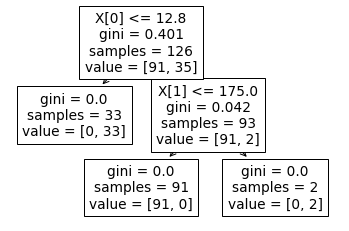

In [41]:
tree.plot_tree(classifier)

In [42]:
predictions=classifier.predict(X_test)

In [43]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [44]:
y_test

7      1
44     0
113    0
120    0
63     0
122    0
121    0
139    0
109    0
92     0
24     1
141    0
26     1
60     0
80     0
97     0
129    0
98     0
142    0
56     0
45     0
33     1
59     0
8      1
40     1
37     1
101    0
19     1
144    0
108    0
51     0
54     0
Name: Class, dtype: int64

VALIDATION

In [45]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  1.0


In [46]:
precision = precision_score(y_test, predictions)
print("Precision : ",precision)

Precision :  1.0


In [47]:
recall = recall_score(y_test, predictions)
print("Recall : ",recall)

Recall :  1.0


In [48]:
f1 = f1_score(y_test, predictions)
print("F1_Score : ",f1)

F1_Score :  1.0


In [49]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[24  0]
 [ 0  8]]


In [50]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [51]:
class_Alice = classifier.predict([[to_predict_Hemoglobin, to_predict_Glucose_Level]])

In [52]:
class_Alice

array([1], dtype=int64)

In [53]:
print("Alice doesn't have CKD")

Alice doesn't have CKD


CLASSIFIER - NEURAL NETWORKS

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [55]:
def nn(inputs):
    x = Dense(units=128,activation="relu")(inputs)
    x = Dense(units=1,activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=x)
    return model

In [56]:
from tensorflow.keras.losses import BinaryCrossentropy
inputs = tf.keras.layers.Input(shape=(2,))
rms = tf.keras.optimizers.RMSprop(lr=0.001)
model = nn(inputs)

model.compile(optimizer=rms, loss=BinaryCrossentropy(),metrics = "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [57]:
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
4/4 [==============================] - 3s 6ms/step - loss: 0.5511 - accuracy: 0.7698
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3111 - accuracy: 0.8730
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2640 - accuracy: 0.9206
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2190 - accuracy: 0.9048
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.9127
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3216 - accuracy: 0.8730
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2067 - accuracy: 0.9127
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1964 - accuracy: 0.9286
Epoch 9/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1912 - accuracy: 0.9127
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1849 - accuracy: 0.9365
Epoch 11/50
4/4 [======================

In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [59]:
predictions=model.predict(X_test)

1/1 [==============================] - 0s 90ms/step


In [60]:
predictions=pd.DataFrame(predictions,columns=["preds"])

In [61]:
predictions.head()

,preds
0,0.120155
1,0.001854
2,0.002653
3,0.307597
4,0.056638


In [62]:
predictions[predictions.preds>0.5]=1
predictions[predictions.preds<0.5]=0

In [63]:
predictions=np.array(predictions.preds.astype("int"))

In [64]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

VALIDATION

In [65]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.90625


In [66]:
precision = precision_score(y_test, predictions)
print("Precision : ",precision)

Precision :  0.8571428571428571


In [67]:
recall = recall_score(y_test, predictions)
print("Recall : ",recall)

Recall :  0.75


In [68]:
f1 = f1_score(y_test, predictions)
print("F1_Score : ",f1)

F1_Score :  0.7999999999999999


In [69]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[23  1]
 [ 2  6]]


In [70]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32



In [71]:
class_Alice = classifier.predict([[to_predict_Hemoglobin, to_predict_Glucose_Level]])
class_Alice

array([1], dtype=int64)

In [72]:
print("Alice doesn't have CKD")

Alice doesn't have CKD


# PART - C : Q-5

<b> The first model for all the three datasets will be KNN classifier and the other 2 models chosen by me are decision trees and a random forests classifier </b>

In [73]:
df=pd.read_csv("wine.csv")

EDA and VISUALIZATIONS

In [74]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [75]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [77]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [78]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [79]:
len(df.columns)

14

In [80]:
corr_matrix = df.corr()
print(corr_matrix["Wine"])

Wine                    1.000000
Alcohol                -0.328222
Malic.acid              0.437776
Ash                    -0.049643
Acl                     0.517859
Mg                     -0.209179
Phenols                -0.719163
Flavanoids             -0.847498
Nonflavanoid.phenols    0.489109
Proanth                -0.499130
Color.int               0.265668
Hue                    -0.617369
OD                     -0.788230
Proline                -0.633717
Name: Wine, dtype: float64


In [81]:
print("Comparitively features Malic Acid and Nonflavanoid.phenols are highly correlated with output. These two can be used for visualizations ")

Comparitively features Malic Acid and Nonflavanoid.phenols are highly correlated with output. These two can be used for visualizations 


In [82]:
np.unique(df.Wine)

array([1, 2, 3], dtype=int64)

In [83]:
print("Number of samples in class 1  : ",len(df[df.Wine==1]))
print("Number of samples in class 2  : ",len(df[df.Wine==2]))
print("Number of samples in class 3  : ",len(df[df.Wine==3]))

Number of samples in class 1  :  59
Number of samples in class 2  :  71
Number of samples in class 3  :  48


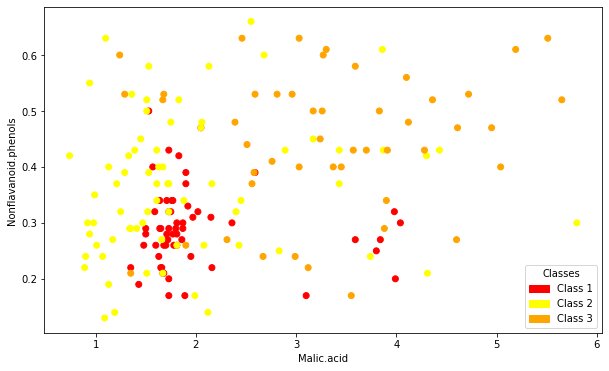

In [84]:
import matplotlib
from matplotlib.patches import Patch
x_feature = df["Malic.acid"]
y_feature = df["Nonflavanoid.phenols"]
plt.figure(figsize=(10, 6))
colors=["red","yellow","orange"]
plt.scatter(x_feature, y_feature, c=[colors[labels-1] for labels in df.Wine])
plt.xlabel("Malic.acid")
plt.ylabel("Nonflavanoid.phenols")
class_labels = ['Class 1', 'Class 2','Class 3']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Wine"), df["Wine"], test_size=0.2,random_state=0)

CLASSIFIER - KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [87]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
predictions=classifier.predict(X_test)

In [89]:
predictions

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 2, 1, 2, 1,
       3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [90]:
y_test

54     1
151    3
63     2
55     1
123    2
121    2
7      1
160    3
106    2
90     2
141    3
146    3
5      1
98     2
168    3
80     2
33     1
18     1
61     2
51     1
66     2
37     1
4      1
104    2
60     2
111    2
126    2
86     2
112    2
164    3
26     1
56     1
129    2
45     1
8      1
44     1
Name: Wine, dtype: int64

VALIDATION

In [91]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.7777777777777778


In [92]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.81      0.81      0.81        16
           3       0.40      0.33      0.36         6

    accuracy                           0.78        36
   macro avg       0.69      0.69      0.69        36
weighted avg       0.76      0.78      0.77        36



CLASSIFIER - DECISION TREES

In [93]:
from sklearn import tree

In [94]:
classifier = tree.DecisionTreeClassifier()

In [95]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
predictions=classifier.predict(X_test)

In [97]:
predictions

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

[Text(148.8, 195.696, 'X[9] <= 3.46\ngini = 0.662\nsamples = 142\nvalue = [45, 55, 42]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(186.0, 152.208, 'X[6] <= 2.11\ngini = 0.58\nsamples = 96\nvalue = [45, 9, 42]'),
 Text(111.60000000000001, 108.72, 'X[10] <= 0.97\ngini = 0.245\nsamples = 49\nvalue = [0, 7, 42]'),
 Text(74.4, 65.232, 'X[6] <= 1.58\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(260.40000000000003, 108.72, 'X[0] <= 12.785\ngini = 0.081\nsamples = 47\nvalue = [45, 2, 0]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]')]

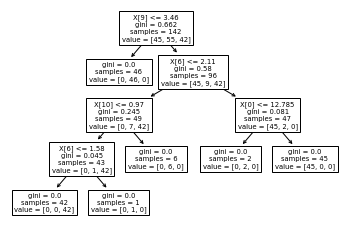

In [98]:
tree.plot_tree(classifier)

In [99]:
y_test

54     1
151    3
63     2
55     1
123    2
121    2
7      1
160    3
106    2
90     2
141    3
146    3
5      1
98     2
168    3
80     2
33     1
18     1
61     2
51     1
66     2
37     1
4      1
104    2
60     2
111    2
126    2
86     2
112    2
164    3
26     1
56     1
129    2
45     1
8      1
44     1
Name: Wine, dtype: int64

VALIDATION

In [100]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.9722222222222222


In [101]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [102]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



CLASSIFIER - RANDOM FORESTS

In [103]:
 from sklearn.ensemble import RandomForestClassifier

In [104]:
classifier = RandomForestClassifier(max_depth=5,random_state=0)

In [105]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [106]:
predictions=classifier.predict(X_test)

In [107]:
predictions

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

VALIDATION

In [108]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.9722222222222222


In [109]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


In [110]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



# PART - D : Q-7

In [111]:
df=pd.read_csv("Housing.csv")

EDA and VISUALIZATIONS

In [112]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [113]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [114]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [115]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.mainroad)
df.mainroad=le.transform(df.mainroad)
le.fit(df.guestroom)
df.guestroom=le.transform(df.guestroom)
le.fit(df.basement)
df.basement=le.transform(df.basement)
le.fit(df.hotwaterheating)
df.hotwaterheating=le.transform(df.hotwaterheating)
le.fit(df.airconditioning)
df.airconditioning=le.transform(df.airconditioning)
le.fit(df.prefarea)
df.prefarea=le.transform(df.prefarea)
le.fit(df.furnishingstatus)
df.furnishingstatus=le.transform(df.furnishingstatus)

In [116]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [117]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [118]:
len(df.columns)

13

In [119]:
corr_matrix = df.corr()
print(corr_matrix["price"])

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64


In [120]:
print("Area is highly correlated to price compared to others : So we shall use area for visualizations")

Area is highly correlated to price compared to others : So we shall use area for visualizations


Text(0, 0.5, 'Price')

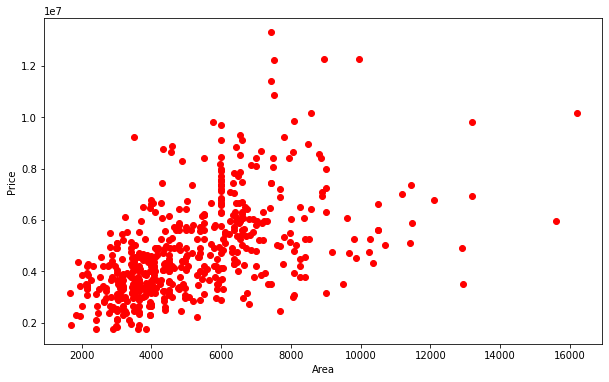

In [121]:
x_feature = df.area
y_feature = df.price
plt.figure(figsize=(10, 6))
plt.scatter(x_feature, y_feature,c="red")
plt.xlabel("Area")
plt.ylabel("Price")

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="area"), df["area"], test_size=0.2,random_state=0)

KNN - REGRESSOR

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
regressor = KNeighborsRegressor(n_neighbors=3)

In [125]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [126]:
predictions=regressor.predict(X_test)

In [127]:
predictions

array([3343.33333333, 5838.33333333, 5160.        , 7526.66666667,
       4455.        , 5166.66666667, 4703.33333333, 4455.        ,
       5623.33333333, 6494.        , 7036.66666667, 5026.66666667,
       6416.66666667, 3157.33333333, 4637.33333333, 3578.        ,
       3922.66666667, 3891.33333333, 4276.66666667, 5693.33333333,
       6346.66666667, 7111.66666667, 5170.        , 3213.        ,
       6107.33333333, 6378.33333333, 5542.66666667, 4243.33333333,
       6176.66666667, 6835.        , 5930.66666667, 3250.        ,
       7956.33333333, 4075.        , 4358.        , 8575.66666667,
       5966.66666667, 3960.        , 4439.66666667, 5693.33333333,
       5873.33333333, 4110.66666667, 5586.66666667, 3249.33333333,
       3993.33333333, 5633.33333333, 4211.66666667, 3157.33333333,
       5260.        , 5513.33333333, 5260.        , 4650.        ,
       3518.33333333, 2757.        , 3157.33333333, 9403.33333333,
       4796.66666667, 5586.66666667, 4502.        , 5226.66666

In [128]:
y_test

239     4000
113     9620
325     3460
66     13200
479     3660
       ...  
76      6420
132     5200
311     6060
464     4500
155     6100
Name: area, Length: 109, dtype: int64

VALIDATION

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [130]:
mse = mean_squared_error(y_test, predictions)
print("Mean squared Error:", mse)

Mean squared Error: 4519051.987767584


In [131]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1602.7584097859324


In [132]:
r2 = r2_score(y_test, predictions)
print("R^2:", r2)

R^2: 0.137687013103457


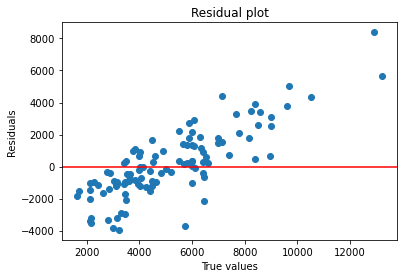

In [133]:
residuals = y_test - predictions
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("True values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

Residuals are randomly distributed around the horizontal axis, it suggests that the model is a decent fit for the data. "Decent" not "good" because the mse and mae are quite high

# PART - D : Q-8

In [134]:
df_train=pd.read_csv("train.csv")

In [135]:
df_test=pd.read_csv("test.csv")

In [136]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df_train.dropna(inplace=True)

In [138]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [139]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [140]:
df_train.drop(columns=["Name","PassengerId"],inplace=True)

In [141]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [142]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


In [143]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train.Embarked)
df_train.Embarked=le.transform(df_train.Embarked)
le.fit(df_train.Cabin)
df_train.Cabin=le.transform(df_train.Cabin)
le.fit(df_train.Ticket)
df_train.Ticket=le.transform(df_train.Ticket)
le.fit(df_train.Sex)
df_train.Sex=le.transform(df_train.Sex)

In [144]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,0.519126,35.674426,0.464481,0.475410,63.262295,78.682469,68.628415,1.278689
std,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,36.265611,76.347843,38.633864,0.957294
min,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,32.500000,29.700000,35.500000,0.000000
50%,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,63.000000,57.000000,68.000000,2.000000
75%,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,95.500000,90.000000,102.500000,2.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,126.000000,512.329200,132.000000,2.000000


In [145]:
corr_matrix = df_train.corr()
print(corr_matrix["Survived"])

Survived    1.000000
Pclass     -0.034542
Sex        -0.532418
Age        -0.254085
SibSp       0.106346
Parch       0.023582
Ticket      0.022768
Fare        0.134241
Cabin      -0.010664
Embarked   -0.100943
Name: Survived, dtype: float64


In [146]:
print("Area is highly correlated to Fare,SibSp compared to others : So we shall use area for visualizations")

Area is highly correlated to Fare,SibSp compared to others : So we shall use area for visualizations


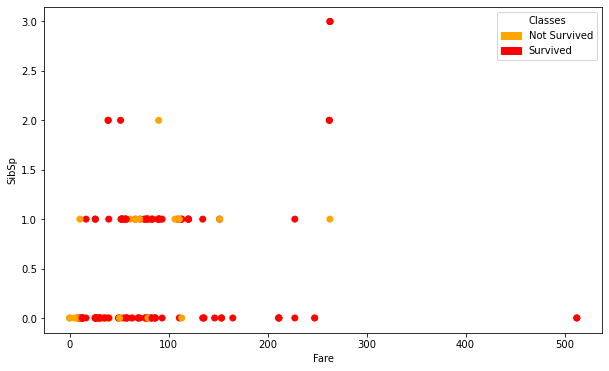

In [147]:
x_feature = df_train.Fare
y_feature = df_train.SibSp
plt.figure(figsize=(10, 6))
colors=["orange","red"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in df_train.Survived])
plt.xlabel("Fare")
plt.ylabel("SibSp")
class_labels = ['Not Survived', 'Survived']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

In [148]:
df_test.dropna(inplace=True)

In [149]:
df_test.drop(columns=["Name","PassengerId"],inplace=True)

In [150]:
le = preprocessing.LabelEncoder()
le.fit(df_test.Embarked)
df_test.Embarked=le.transform(df_test.Embarked)
le.fit(df_test.Cabin)
df_test.Cabin=le.transform(df_test.Cabin)
le.fit(df_test.Ticket)
df_test.Ticket=le.transform(df_test.Ticket)
le.fit(df_test.Sex)
df_test.Sex=le.transform(df_test.Sex)

In [151]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,1,0,23.0,1,0,32,82.2667,12,2
14,1,0,47.0,1,0,65,61.1750,58,2
24,1,0,48.0,1,3,53,262.3750,15,0
26,1,0,22.0,0,1,9,61.9792,10,0
28,1,1,41.0,0,0,7,30.5000,2,2


In [152]:
X=df_train.drop(columns="Survived")

In [153]:
Y=df_train.Survived

LOGISTIC REGRESSION

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
classifier = LogisticRegression()

In [156]:
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
predictions=classifier.predict(df_test)

In [158]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [159]:
#Train-test split within df_train to carry out validations

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [161]:
classifier = LogisticRegression()

In [162]:
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
predictions=classifier.predict(X_test)

In [164]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [165]:
y_test

473    1
110    0
195    1
492    0
835    1
806    0
27     0
681    1
319    1
366    1
21     1
550    1
871    1
632    1
781    1
717    1
581    1
520    1
394    1
742    1
341    1
305    1
218    1
707    1
11     1
332    0
453    1
879    1
262    0
452    0
540    1
327    1
151    1
318    1
820    1
759    1
52     1
Name: Survived, dtype: int64

VALIDATION

In [166]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.8108108108108109


In [167]:
precision = precision_score(y_test, predictions)
print("Precision : ",precision)

Precision :  0.896551724137931


In [168]:
recall = recall_score(y_test, predictions)
print("Recall : ",recall)

Recall :  0.8666666666666667


In [169]:
f1 = f1_score(y_test, predictions)
print("F1_Score : ",f1)

F1_Score :  0.8813559322033899


In [170]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[ 4  3]
 [ 4 26]]


In [171]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.87      0.88        30

    accuracy                           0.81        37
   macro avg       0.70      0.72      0.71        37
weighted avg       0.82      0.81      0.82        37

